# PROJ

AUTHOR: Tamal Majumder

In [89]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from pandas_datareader import data as wb
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [90]:
assets = [
    'RELIANCE.NS','BANKBARODA.NS', 'TCS.NS','BALRAMCHIN.NS','NTPC.NS', 'ASIANPAINT.NS', 'TITAN.NS'
]
assets.sort()
startDate = '2015-01-02'
endDate = '2024-09-01'
pf_data = yf.download(assets, start=startDate, end=endDate)['Adj Close']
#'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'BALRAMCHIN.NS','ONGC.NS','NTPC.NS'

[*********************100%***********************]  7 of 7 completed


In [91]:
pf_data

Ticker,ASIANPAINT.NS,BALRAMCHIN.NS,BANKBARODA.NS,NTPC.NS,RELIANCE.NS,TCS.NS,TITAN.NS
Date,,,,,,,
2015-01-02 00:00:00+00:00,718.749634,53.242470,195.155197,79.494537,380.507538,1106.516968,362.397400
2015-01-05 00:00:00+00:00,718.703369,53.641125,195.101807,79.274323,376.339569,1089.701172,365.332153
2015-01-06 00:00:00+00:00,701.547119,53.862598,188.612946,76.631844,359.259613,1049.528076,352.835754
2015-01-07 00:00:00+00:00,715.642822,54.527020,189.894684,78.476059,367.079926,1037.130493,354.634369
2015-01-08 00:00:00+00:00,760.759094,54.704201,191.835114,79.797310,361.816254,1048.327026,353.025116
...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,3171.350098,564.099976,251.399994,414.850006,3025.199951,4502.450195,3630.199951
2024-08-27 00:00:00+00:00,3166.199951,569.549988,251.199997,409.649994,3000.899902,4497.149902,3551.250000
2024-08-28 00:00:00+00:00,3125.500000,587.400024,249.850006,409.049988,2996.600098,4506.049805,3527.500000


In [92]:
pf_data.isnull().sum()

Ticker
ASIANPAINT.NS    0
BALRAMCHIN.NS    0
BANKBARODA.NS    0
NTPC.NS          0
RELIANCE.NS      0
TCS.NS           0
TITAN.NS         0
dtype: int64

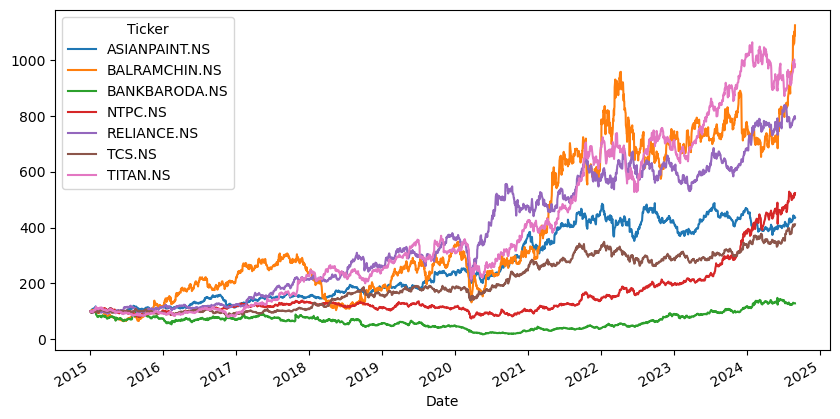

In [93]:
# Normalize the data by dividing each value by the first value in the series
# This effectively converts the data into an index, with the first value being 100%
# (pf_data.iloc[0] is the first row of the dataset)

normalized_data = pf_data / pf_data.iloc[0]

# Multiply by 100 to convert the normalized data into percentage terms
# This helps in better understanding and comparison of the relative changes in stock prices
normalized_data = normalized_data * 100

normalized_data.plot(figsize=(10, 5))
plt.show()


In [94]:
# Calculate daily returns for the stocks
# This line computes the daily returns by comparing the current day's price to the previous day's price.
# Specifically:
# - pf_data.shift(1) shifts the data by one day, aligning the current day's prices with the previous day's prices.
# - Dividing pf_data by pf_data.shift(1) gives the daily return factors (e.g., a value of 1.01 indicates a 1% increase).
# - Subtracting 1 from the result gives the daily returns as decimal values (e.g., 0.01 for a 1% increase).
returns = (pf_data / pf_data.shift(1)) - 1
returns

Ticker,ASIANPAINT.NS,BALRAMCHIN.NS,BANKBARODA.NS,NTPC.NS,RELIANCE.NS,TCS.NS,TITAN.NS
Date,,,,,,,
2015-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00+00:00,-0.000064,0.007488,-0.000274,-0.002770,-0.010954,-0.015197,0.008098
2015-01-06 00:00:00+00:00,-0.023871,0.004129,-0.033259,-0.033333,-0.045384,-0.036866,-0.034206
2015-01-07 00:00:00+00:00,0.020092,0.012335,0.006796,0.024066,0.021768,-0.011813,0.005098
2015-01-08 00:00:00+00:00,0.063043,0.003249,0.010218,0.016836,-0.014339,0.010796,-0.004538
...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,0.005294,-0.000532,-0.004356,0.032094,0.008417,0.008636,0.016863
2024-08-27 00:00:00+00:00,-0.001624,0.009661,-0.000796,-0.012535,-0.008033,-0.001177,-0.021748
2024-08-28 00:00:00+00:00,-0.012855,0.031341,-0.005374,-0.001465,-0.001433,0.001979,-0.006688


### Expected retuen and volitality without using LSTM Model and using random weights and uniform weights

In [95]:
# Calculate the annual returns for each stock by taking the mean of daily returns
# The returns are multiplied by 250, which is the approximate number of trading days in a year, to annualize them
# Finally, multiply by 100 to convert the returns into percentage terms
annual_returns = returns.mean() * 250 * 100

# Sort the annual returns in ascending order for better visualization or comparison
annual_returns.values.sort()

# Display the sorted annual returns
# This provides a clear view of the returns from lowest to highest, which can be useful for portfolio optimization
annual_returns


Ticker
ASIANPAINT.NS    11.830561
BALRAMCHIN.NS    17.623426
BANKBARODA.NS    18.584636
NTPC.NS          20.913572
RELIANCE.NS      25.626751
TCS.NS           28.562626
TITAN.NS         35.686810
dtype: float64

### Expected retuen and volitality without using LSTM Model and using random weights and uniform weights

In [96]:
#Uniform Weights
num_assets = len(assets)
weights = np.ones(num_assets)* (1/num_assets)
weights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [97]:
'''#Random weights
num_assets = len(assets)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights'''

'#Random weights\nnum_assets = len(assets)\nweights = np.random.random(num_assets)\nweights /= np.sum(weights)\nweights'

In [98]:
# Calculate the expected portfolio return
# weights * returns.mean() computes the weighted average of the mean daily returns for each asset
# np.sum(...) sums up these weighted returns to get the total expected daily return for the portfolio
expected_daily_return = np.sum(weights * returns.mean())

# Annualize the portfolio return by multiplying the expected daily return by 250 (the approximate number of trading days in a year)
# This gives the expected annual return for the entire portfolio
expected_annual_return = expected_daily_return * 250

# Display the expected annual return
# This value represents the average annual return you would expect from this portfolio configuration
expected_annual_return


0.22689768849681197

In [99]:
# Calculate the portfolio's annualized volatility (standard deviation of returns)
# returns.cov() computes the covariance matrix of the asset returns, representing the relationships between the returns of different assets
# np.dot(weights.T, np.dot(...)) performs a double dot product: first, it multiplies the covariance matrix by the weights vector, 
# then it multiplies the result by the transposed weights vector
# This calculates the variance of the portfolio, considering the contributions of each asset and their correlations
portfolio_variance = np.dot(weights.T, np.dot(returns.cov() * 250, weights))

# Take the square root of the variance to get the standard deviation (volatility) of the portfolio's returns
# The square root of variance is the standard deviation, which gives the portfolio's risk in the same units as the returns
portfolio_volatility = np.sqrt(portfolio_variance)

# Display the portfolio's annualized volatility
# This value represents the risk associated with the portfolio, showing how much the returns are expected to fluctuate on an annual basis

portfolio_volatility


0.18754991361498974

In [100]:
# Define the risk-free rate (e.g., a common value could be the yield on a 10-year government bond, let's assume 2% as an example)
risk_free_rate = 0.01

# Calculate the Sharpe Ratio
# Subtract the risk-free rate from the expected annual return to get the excess return
# Divide the excess return by the portfolio's volatility to get the Sharpe Ratio
sharpe_ratio = (expected_annual_return - risk_free_rate) / portfolio_volatility

# Display the Sharpe Ratio
# This value represents the risk-adjusted return of the portfolio, where a higher Sharpe Ratio indicates better risk-adjusted performance
sharpe_ratio


1.1564798101803904

In [101]:
corr_matrix = returns.corr()
corr_matrix

Ticker,ASIANPAINT.NS,BALRAMCHIN.NS,BANKBARODA.NS,NTPC.NS,RELIANCE.NS,TCS.NS,TITAN.NS
Ticker,,,,,,,
ASIANPAINT.NS,1.000000,0.159582,0.190339,0.200349,0.312448,0.207322,0.326689
BALRAMCHIN.NS,0.159582,1.000000,0.278773,0.252205,0.217583,0.104216,0.203223
BANKBARODA.NS,0.190339,0.278773,1.000000,0.329446,0.286363,0.115160,0.246607
NTPC.NS,0.200349,0.252205,0.329446,1.000000,0.277058,0.156234,0.244530
RELIANCE.NS,0.312448,0.217583,0.286363,0.277058,1.000000,0.264342,0.283083
TCS.NS,0.207322,0.104216,0.115160,0.156234,0.264342,1.000000,0.202236
TITAN.NS,0.326689,0.203223,0.246607,0.244530,0.283083,0.202236,1.000000


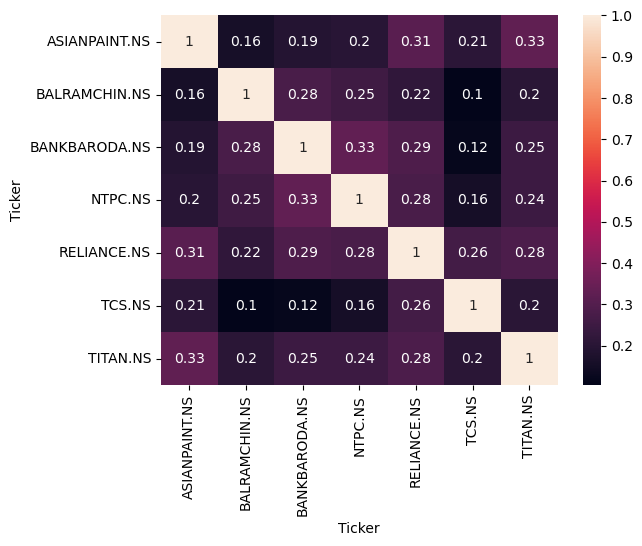

In [16]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# ***Prediction Function For the LSTM Model:***

In [17]:
# Importing Required Library
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [18]:
## Scaling the data set as required

def Scale_data_set(data):
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, scaled_data, dataset, scaler

In [19]:
## Creating a dataSet to be trained by LSTM

def Creating_training_data(training_data_len, scaled_data):
  # Create the training data set 
  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
      
          
  # Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  # x_train.shape

  return x_train, y_train

## Building the LSTM Model

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def LSTM_model(x_train, y_train):
    model = Sequential()
    
    # First LSTM layer with dropout
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    
    # Second LSTM layer with dropout
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Dense layers
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2, verbose=1)
    
    return model


In [21]:
## Predicting data using the trained value

def miscellaneous(model, training_data_len, scaled_data, dataset, scaler):
  # Create the testing data set
  # Create a new array containing scaled values from index 1543 to 2002 
  test_data = scaled_data[training_data_len - 60: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
      
  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values 
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

  return predictions, rmse

In [22]:
import matplotlib.pyplot as plt

def plot_prediction_matplotlib(predictions, training_data_len, data, title):
    # Split the data into training and validation sets
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions

    # Create a figure and plot the data
    plt.figure(figsize=(16, 6))
    
    # Set the title and labels
    plt.title(title, fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Close Price in Rs', fontsize=16)
    
    # Plot the training data (actual values)
    plt.plot(train.index, train['Close'], color='orange', label='Training Data')
    
    # Plot the validation data (actual values)
    plt.plot(valid.index, valid['Close'], color='green', label='Actual Value')
    
    # Plot the predictions
    plt.plot(valid.index, valid['Predictions'], color='red', label='Predicted Data')
    
    # Add a legend
    plt.legend(loc='lower right', fontsize=12)
    
    # Display the plot
    plt.show()

    return train, valid


In [23]:
##  Compiling all functions to one functions

def Stock_prediction(data, title):
    training_data_len, scaled_data, dataset, scaler = Scale_data_set(data)
    x_train, y_train = Creating_training_data(training_data_len, scaled_data)
    model = LSTM_model(x_train, y_train)
    predictions, rmse = miscellaneous(model, training_data_len, scaled_data, dataset, scaler)
    train, valid = plot_prediction_matplotlib(predictions ,training_data_len, data, title)

    return train, valid, rmse, predictions 

## Sending Data for Prediction:

In [24]:
data = {}
for st in assets:
    data['{}'.format(st)] = pf_data.filter([st])

In [25]:
pf_data

Ticker,ASIANPAINT.NS,BALRAMCHIN.NS,BANKBARODA.NS,NTPC.NS,RELIANCE.NS,TCS.NS,TITAN.NS
Date,,,,,,,
2015-01-02 00:00:00+00:00,718.749634,53.242470,195.155197,79.494537,380.507538,1106.516968,362.397400
2015-01-05 00:00:00+00:00,718.703369,53.641125,195.101807,79.274323,376.339569,1089.701172,365.332153
2015-01-06 00:00:00+00:00,701.547119,53.862598,188.612946,76.631844,359.259613,1049.528076,352.835754
2015-01-07 00:00:00+00:00,715.642822,54.527020,189.894684,78.476059,367.079926,1037.130493,354.634369
2015-01-08 00:00:00+00:00,760.759094,54.704201,191.835114,79.797310,361.816254,1048.327026,353.025116
...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,3171.350098,564.099976,251.399994,414.850006,3025.199951,4502.450195,3630.199951
2024-08-27 00:00:00+00:00,3166.199951,569.549988,251.199997,409.649994,3000.899902,4497.149902,3551.250000
2024-08-28 00:00:00+00:00,3125.500000,587.400024,249.850006,409.049988,2996.600098,4506.049805,3527.500000


Epoch 1/50
56/56 [==============================] - 7s 56ms/step - loss: 0.0162 - val_loss: 0.0015
Epoch 2/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 3/50
56/56 [==============================] - 2s 42ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 4/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 5/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/50
56/56 [==============================] - 2s 41ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 7/50
56/56 [==============================] - 3s 46ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/50
56/56 [==============================] - 2s 42ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 10/50
56/56 [==============================] - 2s 42ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 11/

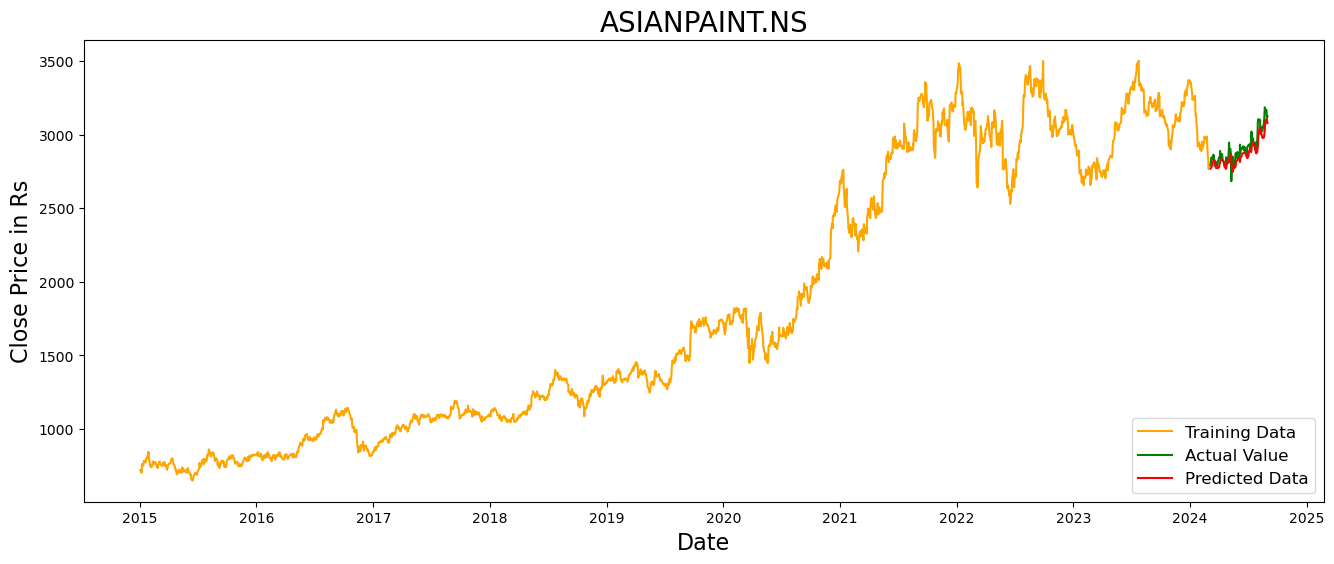

'root mean squared error' of ASIANPAINT.NS = 59.367507461887236
Epoch 1/50
56/56 [==============================] - 7s 64ms/step - loss: 0.0068 - val_loss: 0.0011
Epoch 2/50
56/56 [==============================] - 3s 52ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3/50
56/56 [==============================] - 3s 52ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/50
56/56 [==============================] - 3s 48ms/step - loss: 9.2089e-04 - val_loss: 0.0022
Epoch 5/50
56/56 [==============================] - 3s 48ms/step - loss: 8.2761e-04 - val_loss: 0.0037
Epoch 6/50
56/56 [==============================] - 3s 53ms/step - loss: 9.6875e-04 - val_loss: 7.2331e-04
Epoch 7/50
56/56 [==============================] - 3s 50ms/step - loss: 8.6635e-04 - val_loss: 7.0420e-04
Epoch 8/50
56/56 [==============================] - 3s 49ms/step - loss: 6.4491e-04 - val_loss: 6.7376e-04
Epoch 9/50
56/56 [==============================] - 3s 52ms/step - loss: 6.5524e-04 - val_loss: 0.0012
Epoch 10/

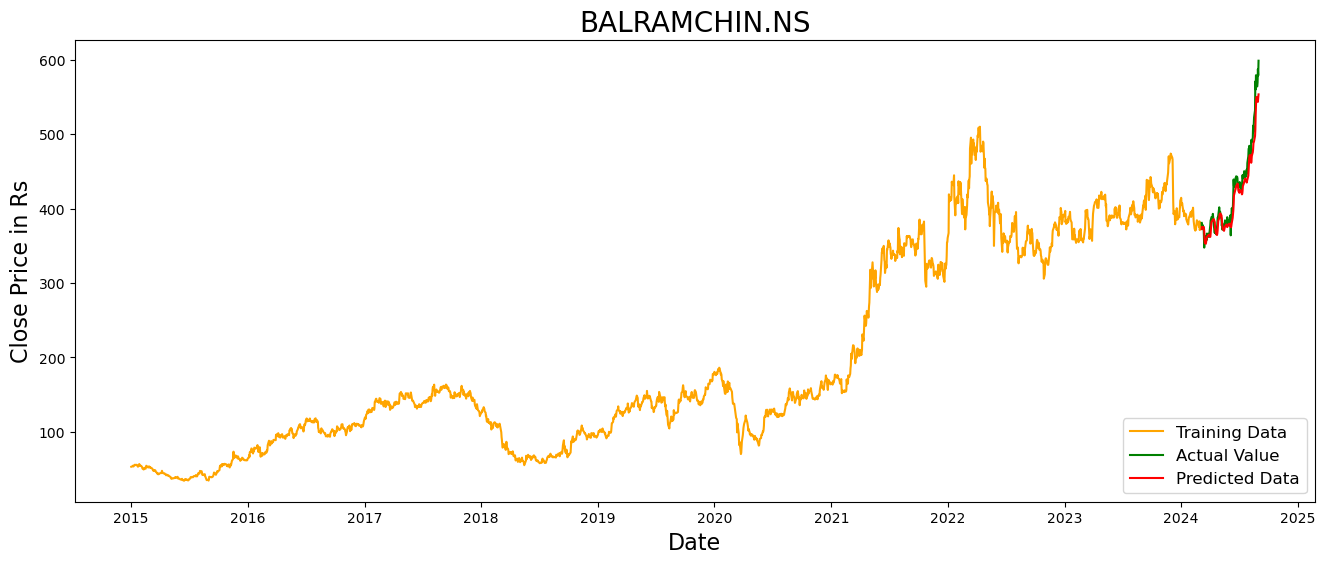

'root mean squared error' of BALRAMCHIN.NS = 16.17175857048929
Epoch 1/50
56/56 [==============================] - 7s 56ms/step - loss: 0.0080 - val_loss: 0.0020
Epoch 2/50
56/56 [==============================] - 3s 46ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 3/50
56/56 [==============================] - 3s 49ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 4/50
56/56 [==============================] - 3s 46ms/step - loss: 0.0011 - val_loss: 7.5347e-04
Epoch 5/50
56/56 [==============================] - 3s 47ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 6/50
56/56 [==============================] - 3s 47ms/step - loss: 0.0011 - val_loss: 7.1386e-04
Epoch 7/50
56/56 [==============================] - 3s 46ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 8/50
56/56 [==============================] - 3s 46ms/step - loss: 8.4477e-04 - val_loss: 0.0038
Epoch 9/50
56/56 [==============================] - 3s 47ms/step - loss: 8.2499e-04 - val_loss: 0.0020
Epoch 10/50
56/56 [===========

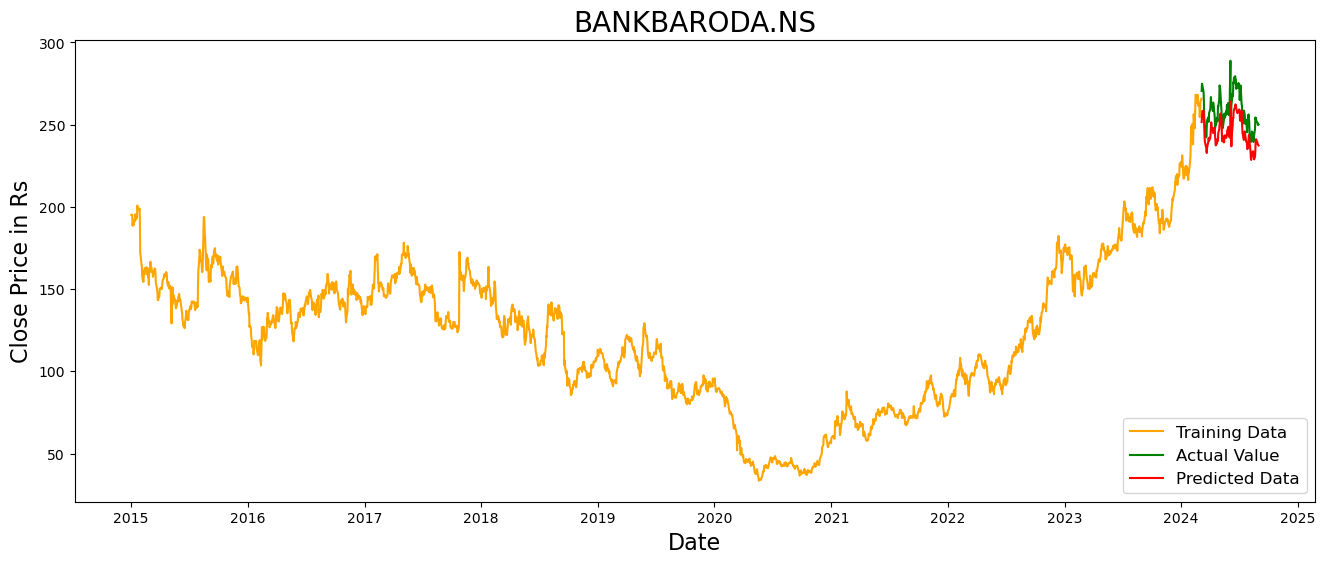

'root mean squared error' of BANKBARODA.NS = 14.5637420812567
Epoch 1/50
56/56 [==============================] - 7s 58ms/step - loss: 8.1566e-04 - val_loss: 0.0024
Epoch 2/50
56/56 [==============================] - 3s 45ms/step - loss: 1.5473e-04 - val_loss: 0.0024
Epoch 3/50
56/56 [==============================] - 3s 46ms/step - loss: 1.2140e-04 - val_loss: 4.2611e-04
Epoch 4/50
56/56 [==============================] - 3s 45ms/step - loss: 1.0568e-04 - val_loss: 0.0023
Epoch 5/50
56/56 [==============================] - 3s 46ms/step - loss: 9.7476e-05 - val_loss: 0.0012
Epoch 6/50
56/56 [==============================] - 3s 46ms/step - loss: 8.9249e-05 - val_loss: 0.0012
Epoch 7/50
56/56 [==============================] - 3s 45ms/step - loss: 9.5506e-05 - val_loss: 0.0012
Epoch 8/50
56/56 [==============================] - 3s 46ms/step - loss: 8.5225e-05 - val_loss: 2.3243e-04
Epoch 9/50
56/56 [==============================] - 3s 46ms/step - loss: 6.7641e-05 - val_loss: 0.0014
Epo

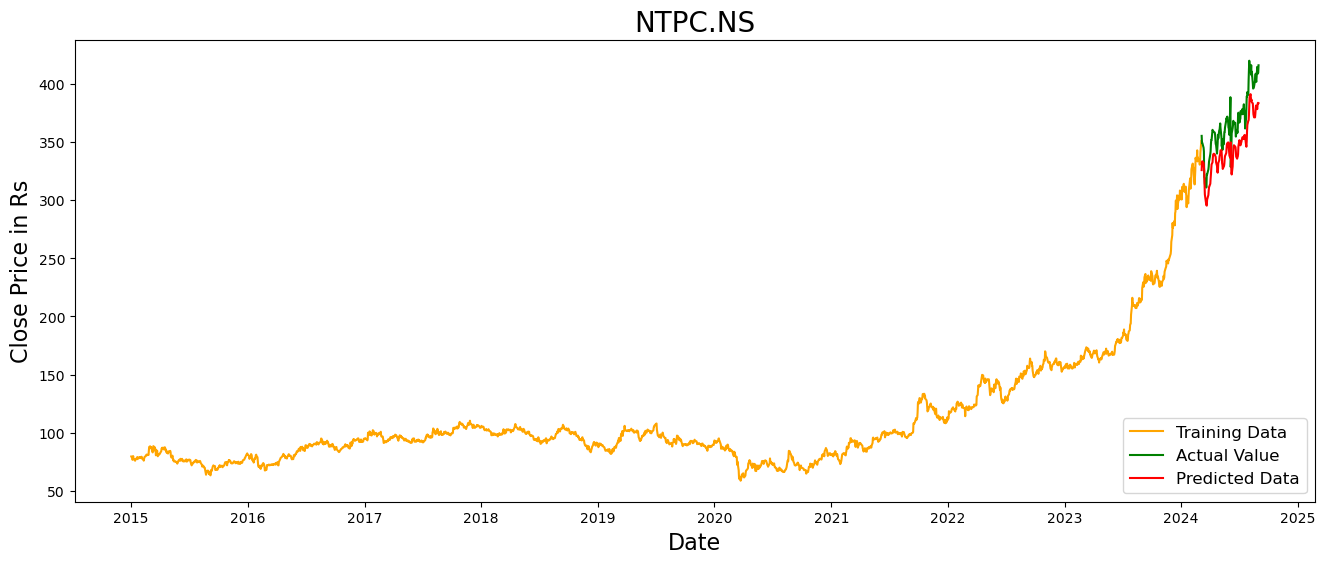

'root mean squared error' of NTPC.NS = 23.73699866234433
Epoch 1/50
56/56 [==============================] - 6s 58ms/step - loss: 0.0093 - val_loss: 0.0044
Epoch 2/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0011 - val_loss: 6.3841e-04
Epoch 4/50
56/56 [==============================] - 2s 44ms/step - loss: 9.6059e-04 - val_loss: 6.5007e-04
Epoch 5/50
56/56 [==============================] - 2s 44ms/step - loss: 9.1290e-04 - val_loss: 0.0011
Epoch 6/50
56/56 [==============================] - 2s 44ms/step - loss: 9.6730e-04 - val_loss: 0.0032
Epoch 7/50
56/56 [==============================] - 2s 44ms/step - loss: 8.4771e-04 - val_loss: 0.0020
Epoch 8/50
56/56 [==============================] - 2s 44ms/step - loss: 7.9627e-04 - val_loss: 8.6300e-04
Epoch 9/50
56/56 [==============================] - 2s 44ms/step - loss: 6.6073e-04 - val_loss: 8.3030e-04
Epoch 10/50


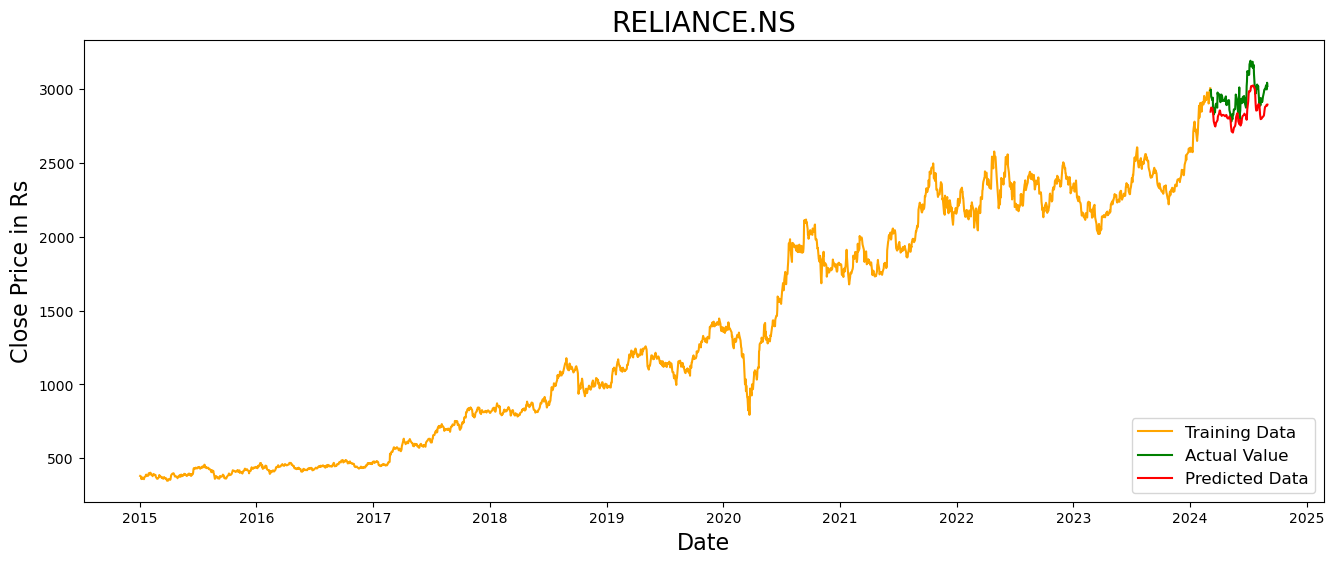

'root mean squared error' of RELIANCE.NS = 121.71445718557632
Epoch 1/50
56/56 [==============================] - 7s 56ms/step - loss: 0.0074 - val_loss: 0.0022
Epoch 2/50
56/56 [==============================] - 3s 47ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 3/50
56/56 [==============================] - 3s 45ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 4/50
56/56 [==============================] - 3s 46ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 5/50
56/56 [==============================] - 2s 44ms/step - loss: 9.8021e-04 - val_loss: 0.0038
Epoch 6/50
56/56 [==============================] - 2s 44ms/step - loss: 8.3034e-04 - val_loss: 0.0015
Epoch 7/50
56/56 [==============================] - 2s 44ms/step - loss: 7.2881e-04 - val_loss: 0.0012
Epoch 8/50
56/56 [==============================] - 2s 44ms/step - loss: 7.4231e-04 - val_loss: 8.7719e-04
Epoch 9/50
56/56 [==============================] - 2s 44ms/step - loss: 0.0010 - val_loss: 9.3759e-04
Epoch 10/50
56/56 [====

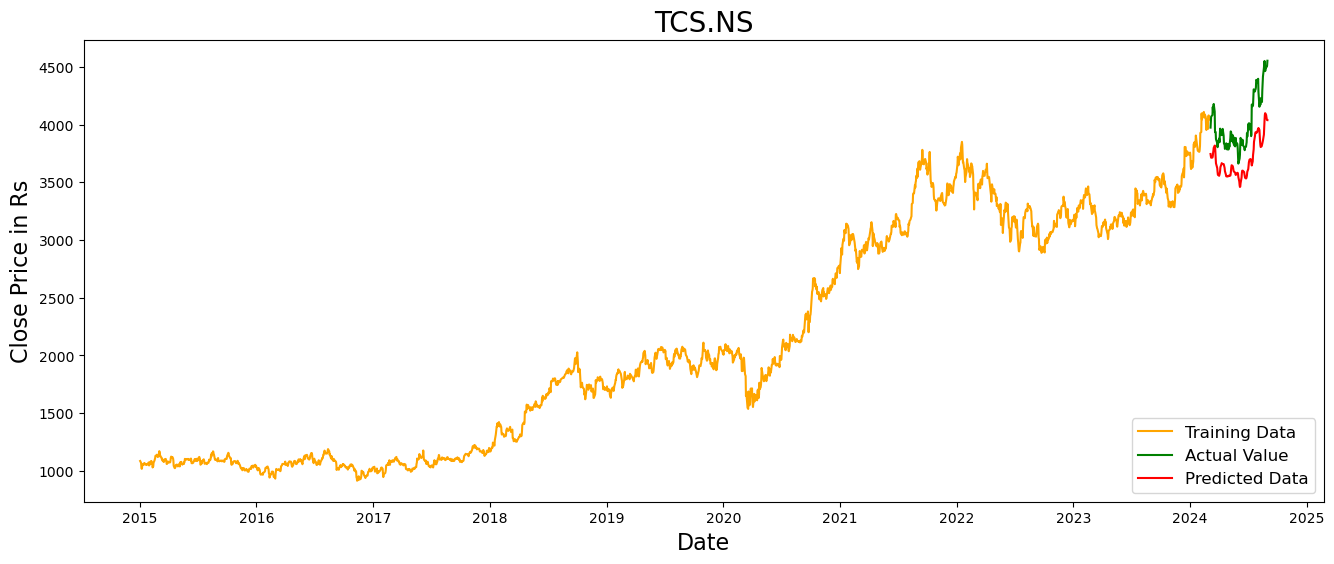

'root mean squared error' of TCS.NS = 330.39259875835916
Epoch 1/50
56/56 [==============================] - 6s 52ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 2/50
56/56 [==============================] - 2s 41ms/step - loss: 6.6291e-04 - val_loss: 0.0038
Epoch 3/50
56/56 [==============================] - 2s 41ms/step - loss: 6.9555e-04 - val_loss: 0.0026
Epoch 4/50
56/56 [==============================] - 2s 41ms/step - loss: 6.4023e-04 - val_loss: 0.0026
Epoch 5/50
56/56 [==============================] - 2s 41ms/step - loss: 5.1841e-04 - val_loss: 0.0052
Epoch 6/50
56/56 [==============================] - 2s 41ms/step - loss: 5.3836e-04 - val_loss: 0.0032
Epoch 7/50
56/56 [==============================] - 2s 44ms/step - loss: 4.9789e-04 - val_loss: 6.1228e-04
Epoch 8/50
56/56 [==============================] - 2s 43ms/step - loss: 4.7959e-04 - val_loss: 0.0053
Epoch 9/50
56/56 [==============================] - 2s 42ms/step - loss: 4.0256e-04 - val_loss: 0.0026
Epoch 10/50
56/5

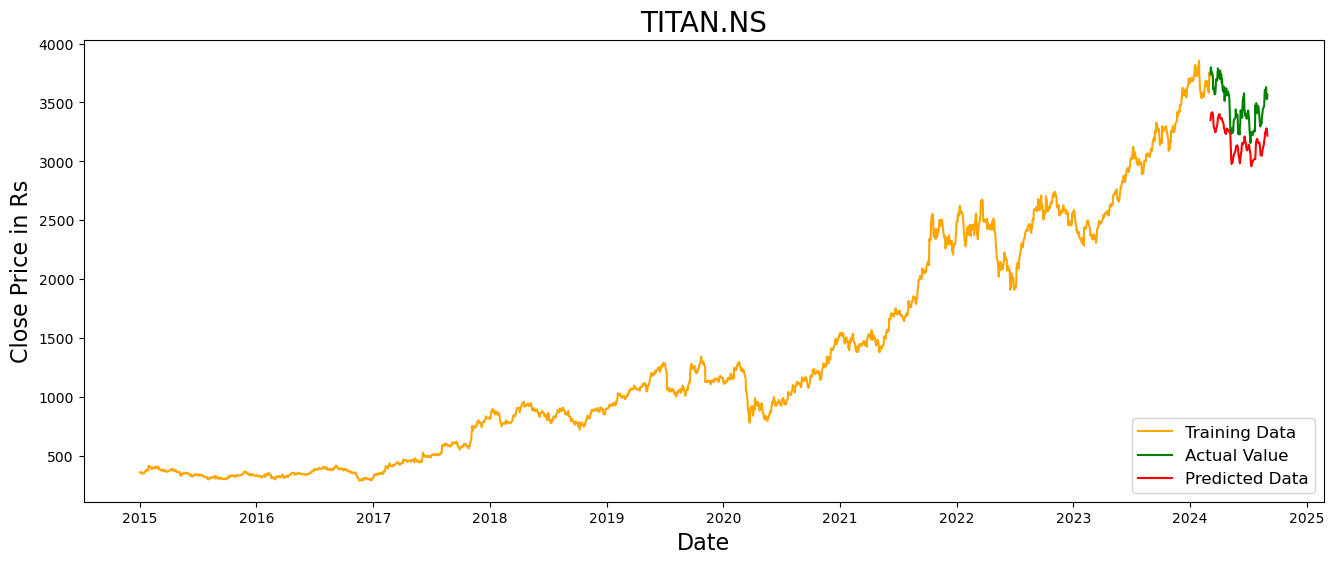

'root mean squared error' of TITAN.NS = 298.5491131924691


In [346]:
for i in assets:
    DATA = data[i]
    DATA = DATA.rename(columns = {i:"Close"})
    train, valid, rmse, predictions = Stock_prediction(DATA, i)
    print("'root mean squared error' of {} = ".format(i) + str(rmse))


## Modern Portfolio Based Optimization : 

In [26]:
pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []

for x in range (5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    pfolio_weights.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [27]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

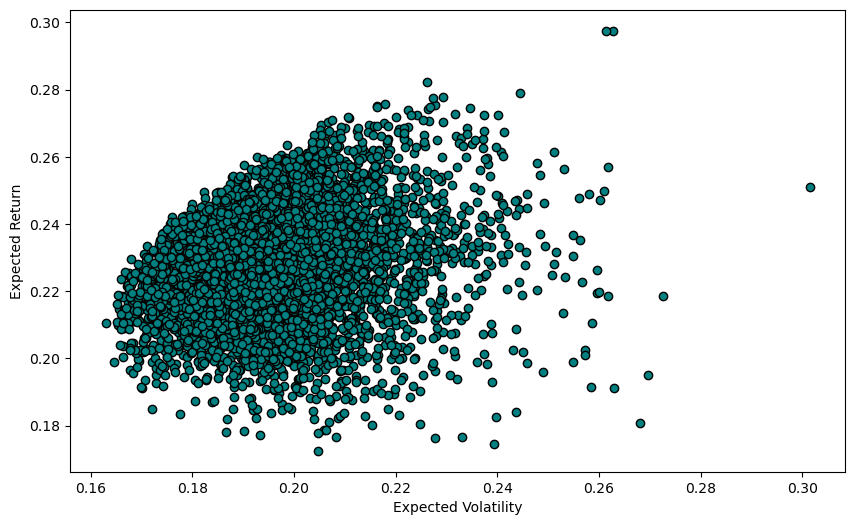

In [28]:
# Using matplotlib scatter plot to customize the edge colors
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Volatility'], portfolios['Return'], edgecolors='k', facecolors='teal')  # edgecolors for the border
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()


### Maximum Return

In [30]:
max_return = max(pfolio_returns)
max_return

0.29752314537975594

In [31]:
max_rindex = np.where(pfolio_returns == max_return)
print(max_rindex)

(array([4529], dtype=int64),)


In [32]:
max_rvolatility = pfolio_volatilities[max_rindex[0][0]]
max_rvolatility

0.26131653026628027

In [33]:
print('Weights for maximum returns:')
max_rweights = pfolio_weights[max_rindex[0][0]]
print(np.round(max_rweights,4))

Weights for maximum returns:
[0.0096 0.431  0.0219 0.0169 0.3567 0.0221 0.1417]


In [34]:
print("Weights for Highest Return Portfolio:\n")
for i in range(num_assets):
    print(f"{assets[i]}: {max_rweights[i]:.4f}")

Weights for Highest Return Portfolio:

ASIANPAINT.NS: 0.0096
BALRAMCHIN.NS: 0.4310
BANKBARODA.NS: 0.0219
NTPC.NS: 0.0169
RELIANCE.NS: 0.3567
TCS.NS: 0.0221
TITAN.NS: 0.1417


### Return With Minimum Volatility

In [35]:
min_volatility = pfolio_volatilities.min()
min_volatility

0.1629359008637911

In [36]:
min_vindex = np.where(pfolio_volatilities == min_volatility)
min_vindex

(array([885], dtype=int64),)

In [37]:
min_vreturns = pfolio_returns[min_vindex[0][0]]
min_vreturns

0.21051906685269575

In [38]:
print('Weights for maximum returns:')
min_vweights = pfolio_weights[min_vindex[0][0]]
print(np.round(min_vweights,4))

Weights for maximum returns:
[0.1953 0.0229 0.0119 0.2149 0.1244 0.3216 0.1092]


In [39]:
print("Weights for Lowest Risk Portfolio:\n")
for i in range(num_assets):
    print(f"{assets[i]}: {min_vweights[i]:.4f}")

Weights for Lowest Risk Portfolio:

ASIANPAINT.NS: 0.1953
BALRAMCHIN.NS: 0.0229
BANKBARODA.NS: 0.0119
NTPC.NS: 0.2149
RELIANCE.NS: 0.1244
TCS.NS: 0.3216
TITAN.NS: 0.1092


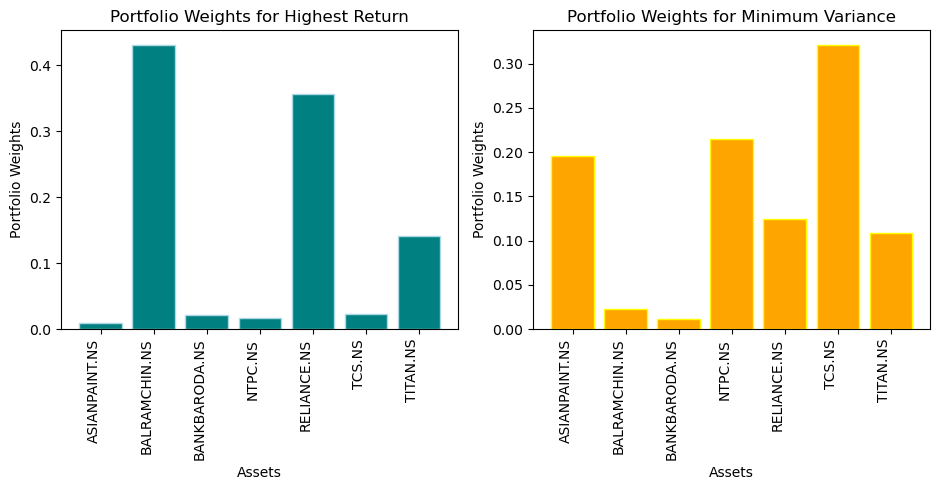

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9.5, 5))  # Adjust the figure size as needed

# First subplot for the portfolio weights of the highest return
plt.subplot(1, 2, 1)
plt.bar(assets, max_rweights, color='teal', edgecolor='lightblue')
plt.xlabel('Assets')
plt.ylabel('Portfolio Weights')
plt.title('Portfolio Weights for Highest Return')
plt.xticks(rotation=90, ha='right')

# Second subplot for the portfolio weights of the minimum variance
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(assets, min_vweights, color='orange', edgecolor='yellow')
plt.xlabel('Assets')
plt.ylabel('Portfolio Weights')
plt.title('Portfolio Weights for Minimum Variance')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()


Maximum Sharpe Ratio: 1.325
Annual Return: 23.94 %
Volatility: 17.31 %

Weights for Maximum Sharpe Ratio Portfolio:
ASIANPAINT.NS: 14.70%
BALRAMCHIN.NS: 10.40%
BANKBARODA.NS: 0.08%
NTPC.NS: 20.70%
RELIANCE.NS: 18.67%
TCS.NS: 17.78%
TITAN.NS: 17.66%


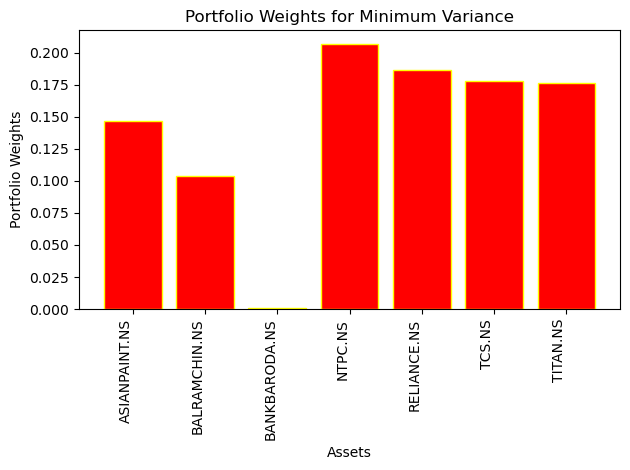

In [62]:
# Calculate daily returns
returns = pf_data.pct_change().dropna()

# Calculate expected annual returns and covariance matrix
annual_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Number of portfolios to simulate
num_portfolios = 10000

# Initialize arrays to hold portfolio metrics
results = np.zeros((3, num_portfolios))
weights_record = []

# Risk-free rate (assumed to be 0 for simplicity)
risk_free_rate = 0.01

# Simulate random portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    # Save the weights
    weights_record.append(weights)
    
    # Expected portfolio return
    portfolio_return = np.sum(weights * annual_returns)
    
    # Expected portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Portfolio Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    # Save portfolio metrics
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = sharpe_ratio

# Locate the maximum Sharpe ratio portfolio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_ratio = results[2,max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Print the results
print("Maximum Sharpe Ratio:", np.round(max_sharpe_ratio,3))
print("Annual Return:", np.round(max_sharpe_return*100,2),'%')
print("Volatility:", np.round(max_sharpe_volatility*100,2),'%')
print("\nWeights for Maximum Sharpe Ratio Portfolio:")
for asset, weight in zip(assets, max_sharpe_weights):
    print(f"{asset}: {weight:.2%}")

plt.bar(assets, max_sharpe_weights, color='red', edgecolor='yellow')
plt.xlabel('Assets')
plt.ylabel('Portfolio Weights')
plt.title('Portfolio Weights for Minimum Variance')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()

In [68]:
col = []
col =  ['Returns', 'Volatility']
for i in range(num_assets):
    col.append(pf_data.columns[i])

In [79]:
max_sr = []
max_sr =  [str(round(max_return * 100,3) ) + '%', str(round(max_rvolatility * 100,3)) + '%']
for i in range(num_assets):
    max_sr.append(str(round(max_rweights[i] * 100,3)) + '%')
    
min_vol = []
min_vol =  [str(round(min_vreturns*100,3)) + '%', str(round(min_volatility * 100,3)) + '%']
for i in range(num_assets):
    min_vol.append(str(round(min_vweights[i] *100,3)) + '%')
    
max_sh = []
max_sh =  [str(round(max_sharpe_return * 100,3) ) + '%', str(round(max_sharpe_volatility * 100,3)) + '%']
for i in range(num_assets):
    max_sh.append(str(round(max_sharpe_weights[i] * 100,3)) + '%')    

In [82]:
result_table = pd.DataFrame(columns  = [col], index=['Maximum Return', 'Minimun Risk', 'Maximum Sharpe'])
result_table.iloc[0] = max_sr
result_table.iloc[1] = min_vol
result_table.iloc[2] = max_sh

In [83]:
result_table

,Returns,Volatility,ASIANPAINT.NS,BALRAMCHIN.NS,BANKBARODA.NS,NTPC.NS,RELIANCE.NS,TCS.NS,TITAN.NS
Maximum Return,29.752%,26.132%,0.962%,43.101%,2.19%,1.687%,35.673%,2.213%,14.174%
Minimun Risk,21.052%,16.294%,19.527%,2.286%,1.186%,21.489%,12.438%,32.159%,10.915%
Maximum Sharpe,23.936%,17.31%,14.704%,10.401%,0.082%,20.7%,18.674%,17.782%,17.658%


In [103]:
# Risk-free rate (e.g., 0.03 for 3% annual risk-free rate, adjust as needed)
risk_free_rate = 0.01

# Sharpe Ratio Calculation
def calculate_sharpe_ratio(annual_return, volatility, risk_free_rate):
    return (annual_return - risk_free_rate) / volatility

# Calculate annual return rate and Sharpe ratio for highest return portfolio
highest_return_annual = max_return
highest_return_sharpe_ratio = calculate_sharpe_ratio(highest_return_annual, max_rvolatility, risk_free_rate)

# Calculate annual return rate and Sharpe ratio for lowest risk portfolio
lowest_risk_annual = min_vreturns
lowest_risk_sharpe_ratio = calculate_sharpe_ratio(lowest_risk_annual, min_volatility, risk_free_rate)

# Create a pandas DataFrame to display the results
data = {
    "Portfolio": ["For randomly assigned weights","Highest Return", "Lowest Risk","Maximum Sharpe Ratio"],
    "Annual Return Rate (%)": [expected_annual_return*100,highest_return_annual * 100, lowest_risk_annual * 100,max_sharpe_return*100],
    "Volatility (%)": [portfolio_volatility*100,max_rvolatility * 100, min_volatility * 100,max_sharpe_volatility*100],
    "Sharpe Ratio": [sharpe_ratio,highest_return_sharpe_ratio, lowest_risk_sharpe_ratio,max_sharpe_ratio]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
results_df

,Portfolio,Annual Return Rate (%),Volatility (%),Sharpe Ratio
0,For randomly assigned weights,22.689769,18.754991,1.156480
1,Highest Return,29.752315,26.131653,1.100287
2,Lowest Risk,21.051907,16.293590,1.230662
3,Maximum Sharpe Ratio,23.936033,17.309689,1.325040
